**OUMZIL ZIAD EDDINE**

*09/10/2023*

*Modèles stochastiques en finance MAP 552*

# <center> Computer Problem Set 1.3
# <center> Stochastic Integration

In [2]:
import numpy as np

import matplotlib.pyplot as plt


**The goal is to approximate this integral** $$\int_{0}^{T} W_s dW_s$$

**Methods:**

$$I_n = \large \sum_{i=1}^{n} W_{t^n_{i-1}} \Delta W_{t^n_{i}}, \ \ \ \  J_n = \large \sum_{i=1}^{n} W_{t^n_{i}} \Delta W_{t^n_{i}}, \ \ \ \  K_n = \large \sum_{i=1}^{n} \frac{W_{t^n_{i}}+W_{t^n_{i-1}}}{2} \Delta W_{t^n_{i}}$$



In [118]:
T = 2

def simulation(n, M) :
    W = np.zeros((n+1,M))
    I = np.zeros(M)
    J = np.zeros(M)
    K = np.zeros(M)
    delta = T/n
    
    # Simulation of the brownian motion
    W[1:, :] = np.random.normal(0, 1, size = (n, M))*delta**0.5
    W = np.cumsum(W, axis= 0)
    
    # Computing the approximations of Integral W_s dW_s 
    I = W[:-1, :]* (W[1: , :] - W[:-1, :])
    J = W[1:, :] * (W[1: , :] - W[:-1, :])
    I = I.sum(axis=0)
    J = J.sum(axis=0)
    K = (J + I)/2
    
    return W, I, J, K
        

In [124]:
M = 1000
n = 100
W, I, J, K = simulation(n , M)


# The Error of Approximation
delta_I = W[-1, ]**2/2 - I
delta_J = W[-1, ]**2/2 - J
delta_K = W[-1, ]**2/2 - K

print("The mean of the error of the approximation with I_n : " , delta_I.mean())
print("The mean of the error of the approximation with J_n : " , delta_J.mean())
print("The mean of the error of the approximation with K_n : " , delta_K.mean())



The mean of the error of the approximation with I_n :  1.000503347302694
The mean of the error of the approximation with J_n :  -1.000503347302694
The mean of the error of the approximation with K_n :  7.19597298521436e-19


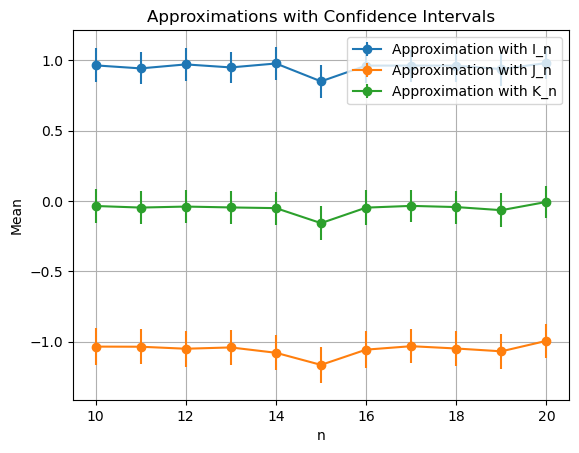

In [162]:
n_min = 10
n_max = 21

samples_mean_I = np.zeros(n_max-n_min)
samples_mean_J = np.zeros(n_max-n_min)
samples_mean_K = np.zeros(n_max-n_min)

margin_of_error_I = np.zeros(n_max-n_min)
margin_of_error_J = np.zeros(n_max-n_min)
margin_of_error_K = np.zeros(n_max-n_min)

x = range(n_min, n_max)

for i,d in enumerate(x) :
    _, I, J, K = simulation(d, M)
    
    delta_I = W[-1, ]**2/2 - I
    delta_J = W[-1, ]**2/2 - J
    delta_K = W[-1, ]**2/2 - K
    
    samples_mean_I[i] = delta_I.mean()
    samples_mean_J[i] = delta_J.mean()
    samples_mean_K[i] = delta_K.mean()
    
    confidence_level = 0.95
    z_score = 1.96
    margin_of_error_I[i]= z_score * delta_I.std() / np.sqrt(M)
    margin_of_error_J[i]= z_score * delta_J.std() / np.sqrt(M)
    margin_of_error_K[i]= z_score * delta_K.std() / np.sqrt(M)
    
    
plt.errorbar(x, samples_mean_I, yerr= margin_of_error_I, fmt='-o', label = 'Approximation with I_n')
plt.errorbar(x, samples_mean_J, yerr=margin_of_error_J, fmt='-o', label = 'Approximation with J_n')
plt.errorbar(x, samples_mean_K, yerr=margin_of_error_K, fmt='-o',label = 'Approximation with K_n')
plt.legend()
plt.xlabel('n')
plt.ylabel('Mean')
plt.title('Approximations with Confidence Intervals')
plt.grid(True)


**conclusion** 

$ K_n = \large \sum_{i=1}^{n} \frac{W_{t^n_{i}}+W_{t^n_{i-1}}}{2} \Delta W_{t^n_{i}}$ approaches the best the stochastic integral

**Evaluating these sums**

$$A_n = \large \sum_{i=1}^{n} e^{t_{i-1}} \Delta W_{t^n_{i}}, \ \ \ \  J_n = \large \sum_{i=1}^{n} e^{t_{i}} \Delta W_{t^n_{i}}, \ \ \ \  K_n = \large \sum_{i=1}^{n} e^{\frac{t_{i}+t_{i-1}}{2}} \Delta W_{t^n_{i}}$$


In [148]:
def simulation_exp(n, M) :
    W = np.zeros((n+1,M))
    A = np.zeros(M)
    B = np.zeros(M)
    C = np.zeros(M)
    delta = T/n
    
    # Simulation of the brownian motion
    W[1:, :] = np.random.normal(0, 1, size = (n, M))*delta**0.5
    W = np.cumsum(W, axis= 0)
    
    # Computing the approximations of Integral W_s dW_s 
    for j in range(M):
        for i in range(1, n+1):
            A[j] += np.exp(delta*(i-1)) * (W[i, j]-W[i-1, j])
            B[j] += np.exp(delta*i) * (W[i, j]-W[i-1, j])
            C[j] += np.exp((delta*i+ delta*(i-1))/2) * (W[i, j]-W[i-1, j])
    
    return W, A, B, C

if $\mathit{I_T} = \int_{0}^{T} e^{s} dW_s $ then :

$$\mathbb{E}[I_T] = 0.0,  \ \ \mathbb{E}[I_T^2] = \int_{0}^{T} (e^s)^2 ds = (e^{2T}-1)/2$$

In [150]:
M = 1000
n = 100
W, A, B, C = simulation_exp(n , M)


# The Error of Approximation

print("The mean of A_n : " , A.mean())
print("The mean of B_n : " , B.mean())
print("The mean of C_n : " , C.mean())

sigma = np.sqrt((np.exp(2*T)-1)/2)
print("The MSE of A_n : ", (A.std()-sigma)**2)
print("The MSE of B_n : ", (B.std()-sigma)**2)
print("The MSE of C_n : ", (C.std()-sigma)**2)


The mean of A_n :  -0.03347875727837741
The mean of B_n :  -0.034155073037831246
The mean of C_n :  -0.03381522438279545
The MSE of A_n :  0.11327292325638279
The MSE of B_n :  0.05701658681271779
The MSE of C_n :  0.08289527281813978


**Next**

$$A_n := sin(W_T) + \frac{1}{2n} \sum_{i=1}^{n} sin(W_{t^n_{i-1}})$$

In [151]:
def simulation_sin(n, M) :
    W = np.zeros((n+1,M))
    A = np.zeros(M)
    delta = T/n
    
    # Simulation of the brownian motion
    W[1:, :] = np.random.normal(0, 1, size = (n, M))*delta**0.5
    W = np.cumsum(W, axis= 0)
    
    # Computing the approximations of Integral W_s dW_s 
    for j in range(M):
        for i in range(1, n+1):
            A[j] += np.sin(W[i-1, j])
        A[j] /= 2*n
        A[j] += np.sin(W[-1, j])
    return W, A

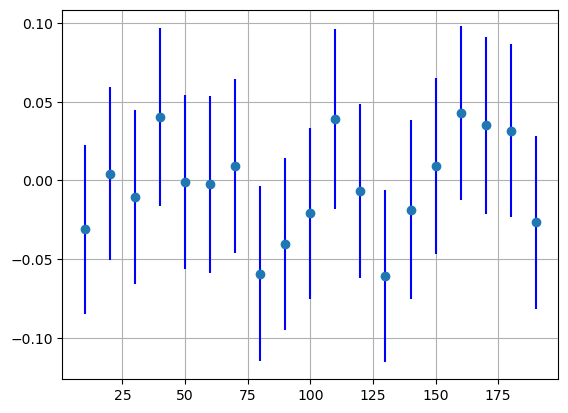

In [170]:
M = 1000
n_min = 10
n_max = 200
x = range(n_min, n_max)

samples = []
margin_of_error = []

confidence_level = 0.95
z_score = 1.96
for d in x :
    _, A = simulation_sin(d, M)
    samples.append(A.mean())
    margin_of_error.append(z_score*A.std()/np.sqrt(M))
plt.errorbar(x[0: -1 : 10], samples[0: -1 : 10], yerr=margin_of_error[0: -1 : 10], fmt ='-o', ecolor='blue')
plt.grid(True)
